In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
# import numpy as np

In [2]:
dataset = "cifar10"

device = torch.device('cuda:3')

data = torch.tensor(pd.read_csv(f"../data/{dataset}/train.csv", header=None).values)
x, y = (data[:, 1:]/255).float().to(device), torch.nn.functional.one_hot(data[:, 0].long(), 10).to(device)

test = torch.tensor(pd.read_csv(f"../data/{dataset}/test.csv", header=None).values)
x_test, y_test = (test[:, 1:]/255).float().to(device), torch.nn.functional.one_hot(test[:, 0].long(), 10).to(device)

In [3]:
class Real(nn.Module): 
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3072, 300)
        self.fc2 = nn.Linear(300, 100)
        self.fc3 = nn.Linear(100, 100)
        self.fc4 = nn.Linear(100, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
model = Real()
model.to(device)
optimiser = torch.optim.Adam(model.parameters(), lr=1.2e-3)
losses = []

In [4]:
for epoch in tqdm(range(1000)):
    batch_size = 5000
    for i in range(0, len(x), batch_size):
        batch_x, batch_y = x[i:i+batch_size], y[i:i+batch_size].float()
        optimiser.zero_grad()
        output = model(batch_x)
        loss = F.mse_loss(output, batch_y)
        loss.backward()
        optimiser.step()
    losses.append(loss.item())

100%|██████████| 1000/1000 [00:55<00:00, 18.03it/s]


Training Accuracy: 72.79%
Testing Accuracy: 49.37%


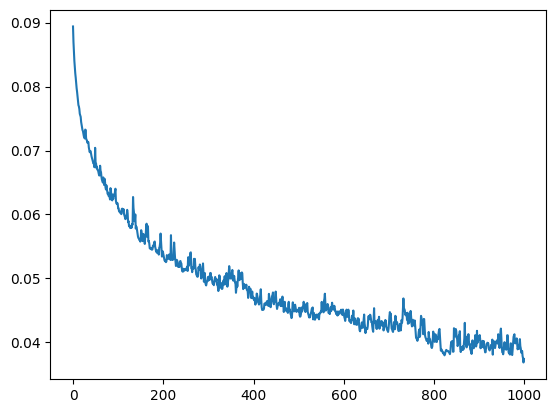

In [5]:
accuracy = (model(x).argmax(1) == y.argmax(1)).sum().item()/len(x)
print(f"Training Accuracy: {accuracy*100:.2f}%")

accuracy = (model(x_test).argmax(1) == y_test.argmax(1)).sum().item()/len(x_test)
print(f"Testing Accuracy: {accuracy*100:.2f}%")

plt.plot(range(len(losses)), losses)